In [1]:
'''
Alejandro Fernández Trigo
'''

'\nAlejandro Fernández Trigo\n'

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Cargamos una imagen (en mi caso es la nº 10):
imagen_real = cv.imread('img/10_NorthCarolina.jpg',cv.IMREAD_GRAYSCALE)

In [6]:
# En lugar de una imagen, usamos una matriz más pequeña para probar la función inicialmente:
img = np.array([
    [12,14,17,24,32,30],
    [19,18,17,26,36,40],
    [26,21,17,28,40,42],
    [20,19,18,26,33,35],
    [14,17,20,23,27,20],
    [35,14,22,13,40,21]
])

# Y un filtro tal que:
filtro = np.array([
    [1,1,1],
    [1,2,1],
    [1,1,1]
])

In [7]:
# Función de filtro:
def funcion_filtro(img, filtro):
    
    # Copiar la imagen:
    imagen = img.copy()
    
    # Calcular cuantos píxeles deben setearse en cero:
    n_ceros = int(len(filtro)/2)
    #print(n_ceros)
    
    # Setear a cero los bordes (tanto como n_ceros) de la imagen:
    for i in range(len(imagen)):
        # Filas
        if(i < n_ceros):
            imagen[i] = 0
            imagen[-(i+1)] = 0
        # Columnas
        for j in range(n_ceros):
            imagen[i][j] = 0
            imagen[i][-(j+1)] = 0
            
    # Modificar la imagen con bordes a cero aplicando el filtro:
    for i in range(len(imagen)):
        for j in range(len(imagen[i])):
            '''
            Solo modificamos aquellos píxeles que:
                * No sean cero
                * No salgan del rango de la imagen
            '''
            if(i==0 or j==0 or i==len(imagen)-1 or j==len(imagen[i])-1):
                imagen = imagen
            else:
                # Actualiza imagen[i][j] con el valor filtrado:
                imagen[i][j] = aplica_filtro(img, i, j, filtro)

    return imagen

# Aplicamos el filtro sobre la imagen dada:
''' 
Recibe:
    * Imagen
    * Índices
    * Filtro
'''
def aplica_filtro(img, i, j, filtro):
    
    valor=0
    
    # Calcular las dimensiones del filtro para determinar el offset:
    offsetF = int(len(filtro)/2)
    offsetC = int(len(filtro)/2)
    
    # Calcular las dimensiones del filtro:
    fc = int(len(filtro)/2)
    cc = int(len(filtro)/2)
    
    # El offset por filas y columnas nos indica los píxeles vecinos que modificamos:
    for n in range(-offsetF, offsetF+1):
        for m in range(-offsetC, offsetC+1):
            valor += img[i+n][j+m] * filtro[fc+n][cc+m]

    # El sumatorio del filtro lo calculo con numpy:
    return np.round(valor/np.sum(filtro))

In [8]:
# Llamamos a la función filtro:
resultado = funcion_filtro(img, filtro)

In [9]:
# Mostramos la imagen original:
print(img)

[[12 14 17 24 32 30]
 [19 18 17 26 36 40]
 [26 21 17 28 40 42]
 [20 19 18 26 33 35]
 [14 17 20 23 27 20]
 [35 14 22 13 40 21]]


In [10]:
# Mostramos la imagen filtrada: requiere de un round para que de valores correctos!
print(resultado)

[[ 0  0  0  0  0  0]
 [ 0 18 20 26 33  0]
 [ 0 20 21 27 35  0]
 [ 0 19 21 26 31  0]
 [ 0 20 19 24 26  0]
 [ 0  0  0  0  0  0]]


In [11]:
# Se puede verificar que funciona correctamente.

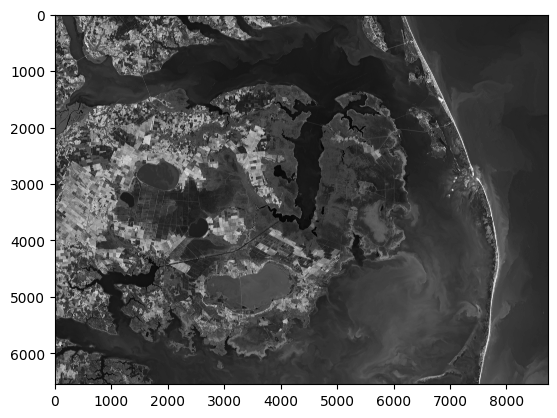

In [12]:
# Para verlo con una imagen de verdad en lugar de una matriz:
# print(imagen_real)
plt.imshow(imagen_real, cmap='gray')

In [15]:
'''
    ¡NO EJECUTAR!
¡ESTO TARDA MUCHÍSIMO!
'''

# Lo aplicamos sobre esa imagen: ¡ESTO TARDA MUCHO!
resultado_real = funcion_filtro(imagen_real, filtro)

# Mostramos la imagen real filtrada:
# print(resultado_real)
plt.imshow(resultado_real, cmap='gray')

'\n    ¡NO EJECUTAR!\n¡ESTO TARDA MUCHÍSIMO!\n'